# Pizza Hut Clustering (:

Data obtained from: https://www.kaggle.com/datasets/abhi10699/pizza-hut-reviews

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load our data

In [3]:
# Change the path to the csv file if needed! 
df = pd.read_csv('pizza-hut-reviews.csv')

In [154]:
df.head()

,id,review,created_at,ratings,upvotes
0,1,The staff Alexa was very kind and helpful. I h...,"May 28, 2022",1,0
1,2,"I ordered 4 pizzas One veggie lover, one chees...","May 18, 2022",1,0
2,3,"My experience was bad. Had a long day, want to...","May 15, 2022",1,0
3,4,"I do not suggest you order from Pizza Hut, I l...","May 14, 2022",1,2
4,5,Pizza Hut is a scam! I never got my pizza deli...,"May 12, 2022",1,0


We have `id`, `review`, `created_at`, `ratings`, and `upvotes`.

## Data understanding

The `id` we will ignore (since it is just the review id and isn't informative). We see `ratings` go from 1 to 5 and `upvotes` range from 0 to 30.

In [4]:
df.describe()

,id,ratings,upvotes
count,605.000000,605.000000,605.000000
mean,303.000000,1.515702,4.758678
std,174.792734,1.174439,4.024504
min,1.000000,1.000000,0.000000
25%,152.000000,1.000000,2.000000
50%,303.000000,1.000000,4.000000
75%,454.000000,1.000000,7.000000
max,605.000000,5.000000,30.000000


Looks like most of the ratings are bad...  yikes.

In [5]:
df.iloc[200]['review']

'Pizza Hut in Aurora IL is garbage. Placed order online for carry out. Picked up pizza to get home home and find a burned dried out pizza. Called the restaurant and spoke to the manager who suggested I come back and he would replace it. I’m sorry, but I believe if you do it right the first time, you don’t have to have customers coming back wasting time, gas and effort for you to get it right a second time!!!! What a lousy busy practice model. I should have read the “writing on the wall” when I got there and the parking lot was empty!!!'

<Axes: xlabel='ratings', ylabel='count'>

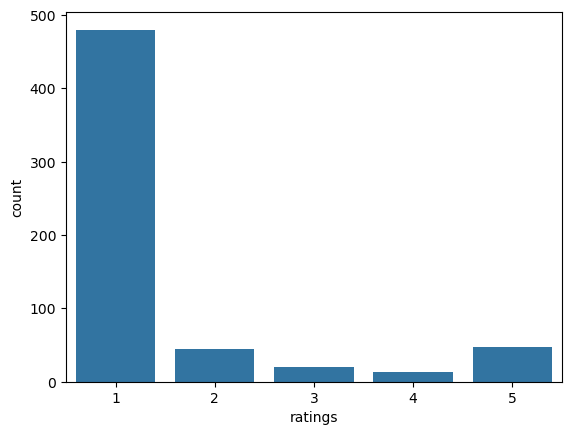

In [6]:
sns.countplot(data=df, x='ratings')

<Axes: xlabel='upvotes', ylabel='count'>

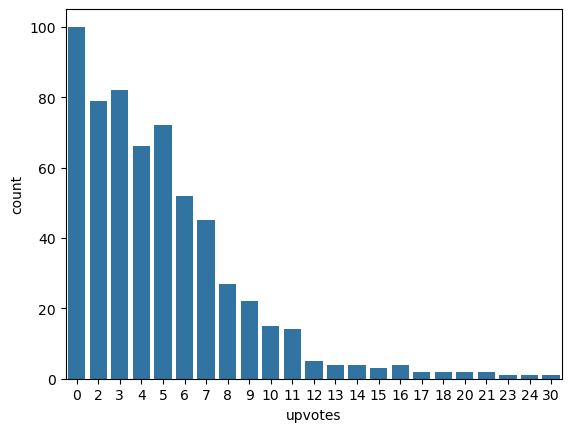

In [7]:
sns.countplot(data=df, x='upvotes')

Looking into how many reviews there are per year:

In [8]:
df['date'] = pd.to_datetime(df['created_at'], format = 'mixed')

In [9]:
df["month"] = df["date"].apply(lambda x: x.month_name())
df["day_name"] = df["date"].apply(lambda x: x.day_name())
df["hour"] = df["date"].apply(lambda x: x.hour)
df["year"] = df["date"].apply(lambda x: x.year)

<Axes: xlabel='year', ylabel='count'>

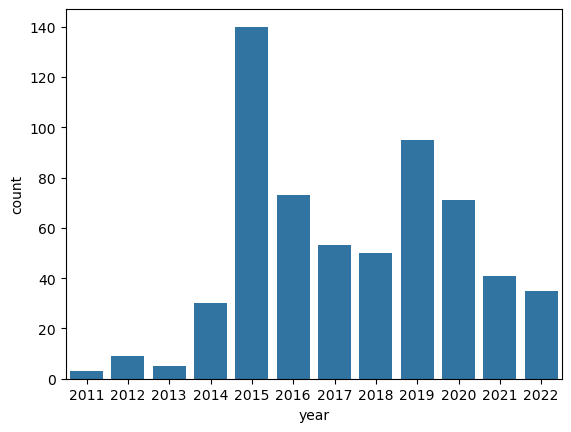

In [10]:
sns.countplot(data=df, x='year')

The days that reviews are created:

<Axes: xlabel='day_name', ylabel='count'>

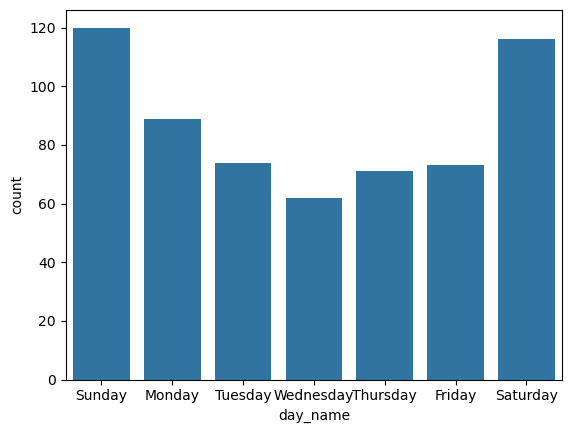

In [11]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.countplot(data=df, x='day_name', order=order)

If we are curious about the ratings in 2022 only...

<Axes: xlabel='ratings', ylabel='count'>

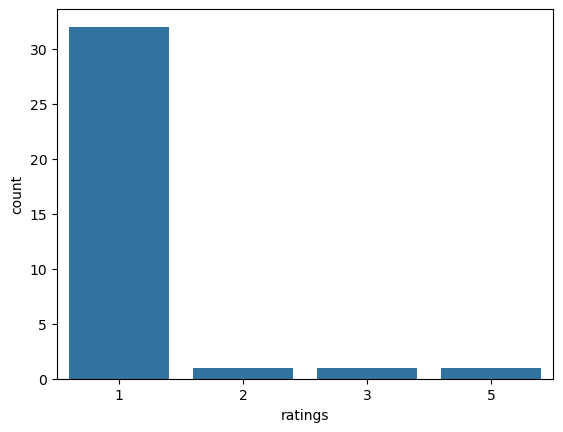

In [12]:
sns.countplot(data=df[df['year'] == 2022], x='ratings')

## Feature engineering

Since we have just raw text as the review, we can't do much with it quite yet.  
Let's explore some ways to get information out of the text.

But first, let's only keep the columns we plan to work with: `review` and `ratings`

In [13]:
df.columns

Index(['id', 'review', 'created_at', 'ratings', 'upvotes', 'date', 'month',
       'day_name', 'hour', 'year'],
      dtype='object')

In [14]:
df = df[['review','ratings']]

In [15]:
df.head()

,review,ratings
0,The staff Alexa was very kind and helpful. I h...,1
1,"I ordered 4 pizzas One veggie lover, one chees...",1
2,"My experience was bad. Had a long day, want to...",1
3,"I do not suggest you order from Pizza Hut, I l...",1
4,Pizza Hut is a scam! I never got my pizza deli...,1


Let's figure out how to get some sentiment scores out of this raw text. There are many methods out there for exploring text and obtaining features from raw text. For now, let's use [NLTK](https://www.nltk.org/), the "natural language toolkit. NLTK is a "leading platform for building Python programs to work with human language data." There are many tutorials and examples on how to use the various NLTK modules. We will use it to gain sentiment values. Example can be viewed here: https://www.nltk.org/howto/sentiment.html

In [167]:
# install
#!pip install nltk 

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer # import

In [ ]:
# Need to run this if haven't before
# import nltk
# nltk.download('vader_lexicon')
# nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /home/tommie-
[nltk_data]     clark/nltk_data...
[nltk_data] Downloading package stopwords to /home/tommie-
[nltk_data]     clark/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Just to get a sample of what this looks like...

In [19]:
sentiment = SentimentIntensityAnalyzer()

In [20]:
sample = df[0:3]['review']

In [21]:
for s in sample:
    print(s)
    ss = sentiment.polarity_scores(s)
    print(ss)
    print('---------------------------------------')

The staff Alexa was very kind and helpful. I had donated 20 pizzas to my children's graduation party/dance. I went in person to make sure I placed such a large order correctly and was going to be delivered to the correct place at the proper time. I asked about getting my reward points for this extremely large order. The staff said “I’m sorry I can’t get a receipt right now”. However, I went back in a few days later she was able to print a receipt out for me and gave me a phone number to call customer service to ask that the points to be added. Customer service said the points weren’t added because they didn’t have my phone number or my name. I sent a copy of the receipt circle the top in red that has my name in phone number on it. That is how I place the order in the first place. 
{'neg': 0.009, 'neu': 0.871, 'pos': 0.121, 'compound': 0.9344}
---------------------------------------
I ordered 4 pizzas One veggie lover, one cheese lover and two Great Beyond pizzas. When checked the toppi

Note, the `compound` score calculates the sum of all the ratings normalized between -1 (most negative) and +1 (most positive). `neg`, `neu`, and `pos` are rather self explanatory.

There are also methods for cleaning textual data, which we will not get too far into. One, however, is to remove "stop words." Stop words are words such as "a", "and", "the", etc... as they are common words that do not hold meaning.

In [22]:
# import stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [23]:
df['cleaned_reviews'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

If we check the sentiment again, we can see that this step does make a difference in the scoresd.

In [24]:
sample = df[0:3]['cleaned_reviews']

for s in sample:
    print(s)
    ss = sentiment.polarity_scores(s)
    print(ss)
    print('---------------------------------------')

The staff Alexa kind helpful. I donated 20 pizzas children's graduation party/dance. I went person make sure I placed large order correctly going delivered correct place proper time. I asked getting reward points extremely large order. The staff said “I’m sorry I can’t get receipt right now”. However, I went back days later able print receipt gave phone number call customer service ask points added. Customer service said points weren’t added didn’t phone number name. I sent copy receipt circle top red name phone number it. That I place order first place.
{'neg': 0.014, 'neu': 0.796, 'pos': 0.19, 'compound': 0.9274}
---------------------------------------
I ordered 4 pizzas One veggie lover, one cheese lover two Great Beyond pizzas. When checked toppings great beyond, got Soya chunks Beyond meat Italian sausage crumbles. Either recipe wrong local store cutting corners. When called later report this, credit anything "should've called day customer service get". What "GREAT scam" name "Gre

Let's iterate through and make a new column for each sentiment score.

In [25]:
df['neg'] = df['cleaned_reviews'].apply(lambda x: sentiment.polarity_scores(x)['neg'])
df['neu'] = df['cleaned_reviews'].apply(lambda x: sentiment.polarity_scores(x)['neu'])
df['pos'] = df['cleaned_reviews'].apply(lambda x: sentiment.polarity_scores(x)['pos'])
df['compound'] = df['cleaned_reviews'].apply(lambda x: sentiment.polarity_scores(x)['compound'])

In [26]:
df.head()

,review,ratings,cleaned_reviews,neg,neu,pos,compound
0,The staff Alexa was very kind and helpful. I h...,1,The staff Alexa kind helpful. I donated 20 piz...,0.014,0.796,0.190,0.9274
1,"I ordered 4 pizzas One veggie lover, one chees...",1,"I ordered 4 pizzas One veggie lover, one chees...",0.108,0.532,0.360,0.9699
2,"My experience was bad. Had a long day, want to...",1,"My experience bad. Had long day, want grab qui...",0.105,0.811,0.084,-0.5584
3,"I do not suggest you order from Pizza Hut, I l...",1,"I suggest order Pizza Hut, I literally paid 25...",0.000,0.927,0.073,0.2023
4,Pizza Hut is a scam! I never got my pizza deli...,1,Pizza Hut scam! I never got pizza delivered ho...,0.259,0.741,0.000,-0.8260


Now we have the sentiment scores for each row!

## Now for K-means clustering!

In [27]:
from sklearn.cluster import KMeans

First, let's define our X as just the sentiment values:

In [28]:
X = df[['neg','neu','pos','compound']]

Now to figure out how many clusters (what value of K) we want.  
Below, we are iterating between different numbers of K (from 1 to 7), making clusters based on that K, and then saving the `inertia` to plot. What is inertia? It is the "within-cluster sum-of-squares" distance. So, the sum of the distances between each point within a cluster and that cluster's center point.

Text(0, 0.5, 'Variance')

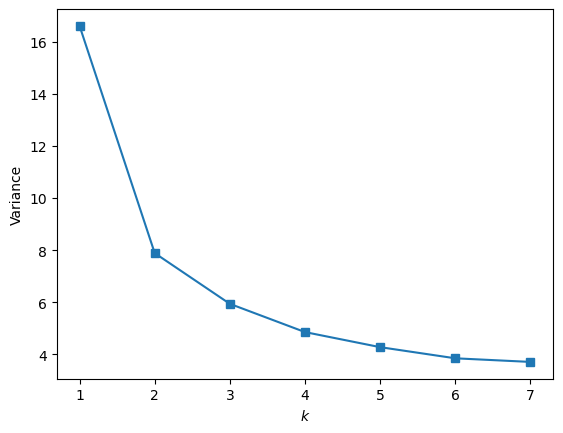

In [29]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init = 'auto').fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

This part can get subjective, but we can now use this plot to determine the best value of K -- where the plot drops the most and then starts to decrease more slowly is that "best point." Here, it looks like K = 2 is most optimal.

Now let's make our model!

In [30]:
kmeans = KMeans(n_clusters = 2, random_state = 1,n_init= 10).fit(X)

We can now get the cluster that each point belongs to:

In [31]:
y = kmeans.fit_predict(X)

And this just saves it back into the dataframe for us.

In [32]:
df['cluster'] = y

In [33]:
df.head()

,review,ratings,cleaned_reviews,neg,neu,pos,compound,cluster
0,The staff Alexa was very kind and helpful. I h...,1,The staff Alexa kind helpful. I donated 20 piz...,0.014,0.796,0.190,0.9274,0
1,"I ordered 4 pizzas One veggie lover, one chees...",1,"I ordered 4 pizzas One veggie lover, one chees...",0.108,0.532,0.360,0.9699,0
2,"My experience was bad. Had a long day, want to...",1,"My experience bad. Had long day, want grab qui...",0.105,0.811,0.084,-0.5584,1
3,"I do not suggest you order from Pizza Hut, I l...",1,"I suggest order Pizza Hut, I literally paid 25...",0.000,0.927,0.073,0.2023,0
4,Pizza Hut is a scam! I never got my pizza deli...,1,Pizza Hut scam! I never got pizza delivered ho...,0.259,0.741,0.000,-0.8260,1


## Visualizing our clusters

With this scatterplot  below, we can see how the more negative and positive clusters are split. But what can we do from here?

<Axes: xlabel='neg', ylabel='pos'>

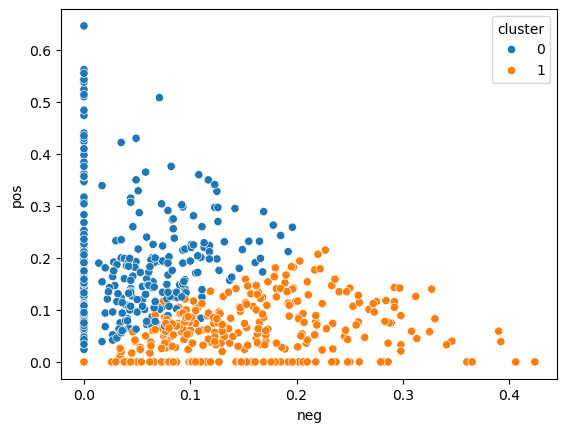

In [34]:
sns.scatterplot(x = df['neg'], y = df['pos'], hue=df['cluster'])

Perhaps we can make an interactive plot to start looking at the individual points.

In [ ]:
# !pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import plotly.express as px

In [36]:
fig = px.scatter(df, x = 'neg', y = 'pos', color='cluster', hover_data=['ratings','neg','neu','pos','compound'])
fig.show()

At a glance, it looks like it is mostly split between positive and negative compound scores... which.. makes sense.

Perhaps if we look deeper into the individual reviews, what kinds of patterns might we notice between the two clusters?

In [37]:
counter = 0
for row in df[df['cluster'] == 0].itertuples():
    if counter == 5:
        break
        
    print(row.review)
    print()
    
    counter = counter + 1

The staff Alexa was very kind and helpful. I had donated 20 pizzas to my children's graduation party/dance. I went in person to make sure I placed such a large order correctly and was going to be delivered to the correct place at the proper time. I asked about getting my reward points for this extremely large order. The staff said “I’m sorry I can’t get a receipt right now”. However, I went back in a few days later she was able to print a receipt out for me and gave me a phone number to call customer service to ask that the points to be added. Customer service said the points weren’t added because they didn’t have my phone number or my name. I sent a copy of the receipt circle the top in red that has my name in phone number on it. That is how I place the order in the first place. 

I ordered 4 pizzas One veggie lover, one cheese lover and two Great Beyond pizzas. When checked the toppings of the great beyond, all we got were the Soya chunks where it should be Beyond meat Italian sausag

In [38]:
counter = 0
for row in df[df['cluster'] == 1].itertuples():
    if counter == 5:
        break
        
    print(row.review)
    print()
    
    counter = counter + 1

My experience was bad. Had a long day, want to grab a quick pizza on way home, did not want to be on internet and driving so I just stop, walked in, order. Got the large 3 topping pizza. When I saw she charged me 18.50 instead of 10 dollars they are advertising, she tells me I have to order online to get it 10 dollars. Why, it's still the same pizza. Also ran into a litter bird that work at 6625 Dixie highway Miami fl 33143. Told me at end of night they re-ring the orders, and pocket the extra for the people they overcharged on the deal pizzas.??? FYI mostly managers but split with some people that want talk. 

Pizza Hut is a scam! I never got my pizza delivered to my house! This is terrible service. Don't order from Pizza Hut! They wouldn't let me add ingredients. I found spit in my pizza and nails in the cheese.

I think it's sad that the Salt and Pepper of Pizza Hut is now charged for. Grated Parmesan and Red pepper flakes should be on the table just like salt and pepper is at any o

## Extra model!

Just an extra model using TFIDF to cluster using individual words instead of sentiment scores. Then displays the keywords for each cluster. Example from [here](https://www.kaggle.com/code/rahulvks/customer-review-analysis).

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
model = vectorizer.fit_transform(df['cleaned_reviews'].str.upper())

In [41]:
km = KMeans(n_clusters=2,n_init = 10)
km.fit(model)

terms = vectorizer.get_feature_names_out()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(2):
    print("cluster %d:" %i,end='')
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind],end='')
    print()    

cluster 0: called said delivery told store minutes time service manager customer
cluster 1: cheese crust sauce ordered like time pizzas good toppings got


<hr>

## Agglomerative clustering

In [42]:
from sklearn.cluster import AgglomerativeClustering

Let's use the same X as above.

In [43]:
X

,neg,neu,pos,compound
0,0.014,0.796,0.190,0.9274
1,0.108,0.532,0.360,0.9699
2,0.105,0.811,0.084,-0.5584
3,0.000,0.927,0.073,0.2023
4,0.259,0.741,0.000,-0.8260
...,...,...,...,...
600,0.170,0.797,0.033,-0.8316
601,0.154,0.813,0.032,-0.7556
602,0.000,0.966,0.034,0.1440
603,0.084,0.916,0.000,-0.6705


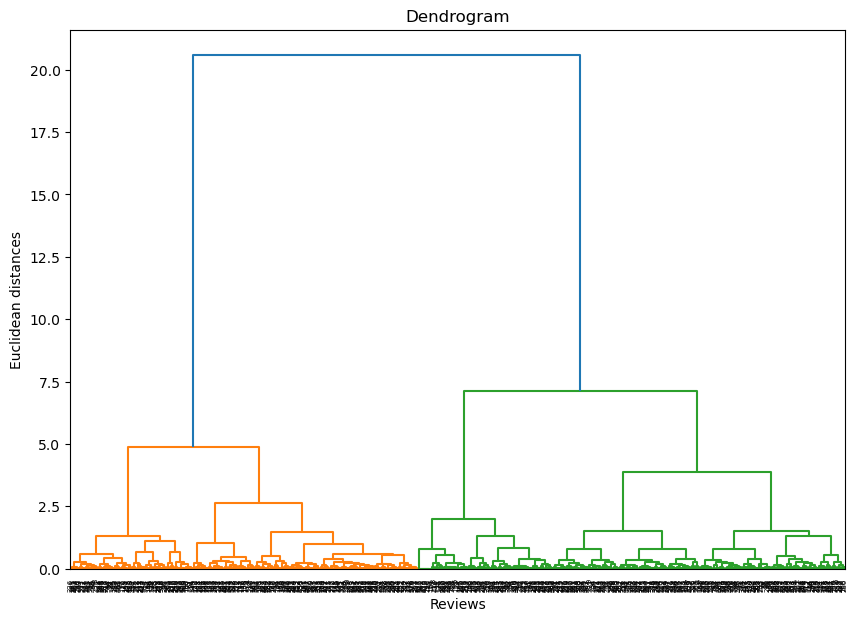

In [44]:
#Create and display a dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title('Dendrogram')
plt.xlabel('Reviews')
plt.ylabel('Euclidean distances')
plt.axhline(y=825, color='r', linestyle='--')
plt.axhline(y=1575, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(X, method='ward'))


To read a dendrogram to find the optimal number of clusters, find the section with the highest width. the number of lines (in this example the blue lines) intersecting the section is the optimal number of clusters. 

In [45]:
#Implement model
agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')  

In [46]:
df['agglo_cluster'] = agglo.fit_predict(X)

In [47]:
fig = px.scatter(df, x = 'neg', y = 'pos', color='agglo_cluster', hover_data=['ratings','neg','neu','pos','compound'])
fig.show()